

The draw arrow function has the following mandatory inputs: 
- x
- y
- angle
- ax_pl  (the axis to plot the arrow on) 

Then there are the following optional inputs (without specifying the standard parameters are used): 
- obj_H=1.,      (object height) 
- obj_A=1.,     (object aspect ratio, height divided by width) 
- facecolor = 'black', 
- edgecolor='black', 
- arrow_type = 1 ,  (arrow type 1 is the triangle, type 2 is the pointy arrow, type 3 is not an arrow, but a rectangle) 
- angle_local_aspect = True,  (if true, the angle is defined within the axis aspect ratio, if false the angle is independent of the axis it is drawn on) 

This demo contains two examples:
- A sinusoid with arrows. This demo explores the options of the arrow function. 
- A phase portrait of a single pendulum. This demo shows a possible application of the function.  

In [1]:
# packages needed to draw arrow 
import numpy as np
import matplotlib.pyplot as plt 

# packages needed for examples  
from scipy.optimize import fsolve
from operator import sub 

In [2]:
def get_aspect(ax_A):
    # Total figure size
    figW, figH = ax_A.get_figure().get_size_inches()
    # Axis size on figure
    _, _, w, h = ax_A.get_position().bounds
    
    # Ratio of display units
    disp_ratio = (figH * h) / (figW * w)
    # Ratio of data units 
    data_ratio = sub(*ax_A.get_ylim()) / sub(*ax_A.get_xlim())

    return disp_ratio / data_ratio
  
def vec_rotation(vector,theta):
    R = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]] )
    return np.dot(R,vector)
  
def draw_arrow( x,y,angle, 
                      ax_pl , 
                      obj_H=1.,obj_A=1., facecolor = 'black', edgecolor='black', 
                      arrow_type = 1 ,angle_local_aspect = True):
    
    x_loc =  np.array([x,y]) 
    
    # acquire information on aspect  
    ax_aspect = get_aspect(ax_pl)   
    
    # determine which angle, and what the rotation point is 
    if arrow_type == 1: 
        X = np.array ([ [0,-0.5  ],  [0,  0.5 ],  [1,0]]) 
        X_c = np.array([0,0]) 
    elif arrow_type == 2: 
        X = np.array ([ [ 0.,0. ],  [-0.5, 0.5 ],  [1.,  0], [-0.5,-0.5 ]])
        X_c = np.array([0,0]) 
    elif arrow_type == 3: 
        X = np.array ([ [-.5,-.5 ],  [-.5, .5],  [.5,  .5], [.5,-.5 ]])
        X_c = np.array([0,0]) 
    
    # scale arrow to specifications 
    H = obj_H   
    W = H*  ax_aspect/obj_A 
    X_dim = X.copy() 
    X_dim[:,1] = X_dim[:,1]  * H
    X_dim[:,0] = X_dim[:,0]  * W
 
    # adjust angle to aspect 
    dx = np.cos(angle)
    dy = np.sin(angle)
    if angle_local_aspect == True:
        rot_ang = np.arctan2( dy*ax_aspect  ,dx  )  
    else: 
        rot_ang = np.arctan2( dy  ,dx  )  

    # adjust aspect 
    X_centered2 = X_dim.copy()  
    X_centered2[:,1] = X_centered2[:,1]*ax_aspect

    # rotate all individual points 
    X_rotated = np.full( np.shape(X),np.nan)
    for j in range( np.shape(X)[0] ):
        X_rotated[j,:] = vec_rotation(X_centered2[j,:],rot_ang)  

    # scale rotated arrow 
    X_rotated2 = X_rotated.copy()
    X_rotated2[:,1] = X_rotated2[:,1]/ax_aspect   
    
    # place scaled and rotated arrow 
    X_transformed = X_rotated2+x_loc
    ax_pl.add_patch( plt.Polygon( X_transformed  ,facecolor=facecolor ,  edgecolor=edgecolor  ) )   

Text(7, 5.8, 'Type 3 arrows with purple edge')

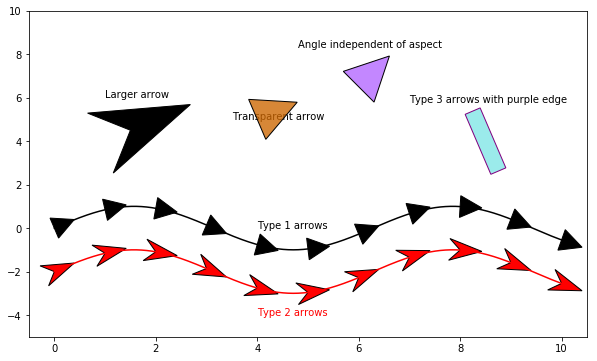

In [9]:
## sinusoid example ##

# define sinusoid 
x = np.linspace(0,10,1001)
y = np.sin(x) 
y_red = np.sin(x) -2
dy = np.cos(x)  
angle = np.arctan2(dy, 1)

f,  ax1 = plt.subplots(1,1,figsize=(10,6) )  

# plot sinusoid lines
plt.plot(x,y,'k') 
plt.plot(x,y_red,'red') 

# see arrows change with different y-axes
ax1.set_ylim([-5,10]) 
# ax1.set_ylim([-10,30]) 

# plot sinusoid arrows
for j in range(len(x) ):
    if np.round(x[j]) == x[j]:
        draw_arrow(x[j],y[j],angle[j],ax1 )  
        draw_arrow(x[j],y_red[j],angle[j],ax1, facecolor='red', arrow_type =2)  
ax1.text( 4,0 ,'Type 1 arrows')   
ax1.text( 4,-4,'Type 2 arrows', color ='red')   




# plot arrow options
draw_arrow( 1.5, 4.5, np.pi/4,
                  ax1, arrow_type =2, obj_A = 1,obj_H = 3)  
ax1.text( 1,6 ,'Larger arrow')   

draw_arrow( 4, 5, np.pi/4,
                  ax1, arrow_type =1, obj_A = 1,obj_H = 2,
                  facecolor = np.array([204,102,0,200])/255 )  
ax1.text( 3.5,5 ,'Transparent arrow',zorder = -1)   

draw_arrow( 6, 6.5, np.pi/4,
                  ax1, arrow_type =1, obj_A = 1,obj_H = 2,
                  facecolor = np.array([153,51,255,150])/255,
                 angle_local_aspect = False)  
ax1.text( 4.8,8.3 ,'Angle independent of aspect' )   

draw_arrow( 8.5,  4, np.pi/4,
                  ax1, arrow_type =3, obj_A = 4,obj_H = 3,
                  facecolor = np.array([0,204,204,100])/255, 
                  edgecolor = 'purple'    )  
ax1.text( 7,5.8 ,'Type 3 arrows with purple edge' )   

# changing y-limits post-hoc would mess with arrow aspect ratio: 
# ax1.set_ylim([-4 ,4])  

D:\D_program_files\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
D:\D_program_files\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


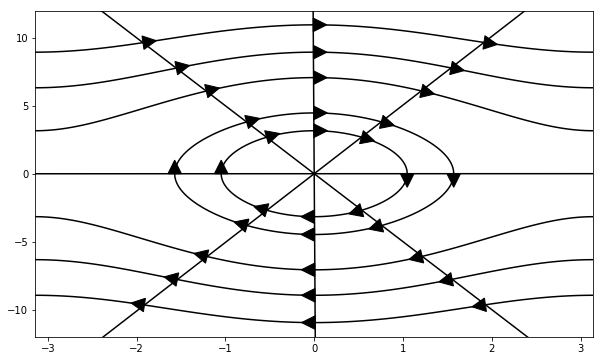

In [4]:
## phase portrait example ##
#NOTE: finding the intersections sometimes triggers a warning, nothing to do with the arrow function so no need to worry. 

# choose axis limits (symmetric bounds) 
x_lim = np.pi
y_lim = 12

# define energy parameters 
L = 1.
g = -10.
mp = 1.  

# define equation to find intersection points 
def energy_eq(x1,*param):
    g, En,angle = param
    return  0.5*( np.tan(angle)*x1)**2 - g*(1-np.cos(x1)) - En   

#prepare energy contours
xc =   np.linspace(- x_lim, x_lim,1001)
yc = np.linspace(- y_lim,y_lim,1001)
Xc, Yc = np.meshgrid(xc, yc) 
Zc = - (1-np.cos(Xc))*L*mp*g+ 0.5*mp*(L*Yc)**2    
lin = np.array([5,10,25,40,60 ])
    
f,  ax1 = plt.subplots(1,1,figsize=(10,6) )  
  
# plot energy contours
CS = ax1.contour(Xc, Yc, Zc ,colors = 'black' , levels = lin, zorder = 1)  
 
# define angles of radial lines   
angle_main = np.arange(0,4,1)*np.pi/2   
angle_off  = np.array( [np.pi*7/16,np.pi*9/16] )  
angle_range = np.concatenate( ( angle_main, angle_off ,- angle_off )   )  +0.001
    
# plot radial lines 
for angle in angle_range:
    plt.plot( [0,np.cos(angle)*20],[0,np.sin(angle)*20],'k')
    
# set axis limits 
ax1.set_xlim([-x_lim,x_lim])
ax1.set_ylim([-y_lim,y_lim])
# IMPORTANT! Do not let axis aspect change post-hoc, because arrows are scaled w.r.t. current aspect ratio

for En in lin: 
    for angle in angle_range:  
        
        # find intersection points of contour with radial lines
        x_sign = np.sign( np.sin(angle) ) 
        y_sign = np.sign( np.cos(angle) ) 
        par = (g,En,angle)
        x  =  fsolve(energy_eq, 1,args=par) *x_sign
        y = np.tan(angle)*x  
        
        # determine arrow at intersection points 
        dy = g/L*np.sin( x[0] )  
        arrow_angle = np.arctan2(  dy, y[0])       
               
        # if intersection point is in window, plot arrow 
        if (y>-y_lim) &(y<y_lim) & (x> (-np.pi+0.01)) & (x < ( np.pi-0.01)): 
            draw_arrow(x[0],y[0],arrow_angle ,ax1 )   
            
# changing y-limits post-hoc would mess with arrow aspect ratio: 
# ax1.set_ylim([-4 ,4]) 